<a href="https://colab.research.google.com/github/othoni-hub/ECG1/blob/main/Ch7_TP_Convergence_suites.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CPGE-ECG1** 
<img src="https://drive.google.com/uc?id=12Wo3LubGGT4qOvYFAuLP4CyCuwjKNVuk" width="230" height="150" align = "right"/>

## **Ch7 - Notebook : Convergence d'une suite réelle**




**O.Thöni - Lycée Saint-Charles Sainte Croix - LE MANS**

In [1]:
from math import sqrt, log, pi, e

import matplotlib.pyplot as plt
import numpy as np

## 1. Suites et limites classiques

### 1.1. Approximations de e 

**_1.1.b. Deux suites adjacentes de type u<sub>n</sub> = f(n) : u<sub>n</sub> = (1+1/n)<sup>n</sup>   ,   v<sub>n</sub> = (1+1/n)<sup>n+1</sup>_**



Ces deux suites convergent vers e, l'une en croissant, l'autre en décroissant (suites adjacentes).

(cours : voir http://www.panamaths.net/Documents/TS/A3page103.pdf)

In [2]:
def f(x):
    f = (1+1/x)**x
    return f

def g(x):
    g = (1+1/x)**(x+1)
    return g

In [3]:
print(f(2), '< e <', g(2))

2.25 < e < 3.375


In [4]:
for k in range(1,10):
    print('n = ',k,' : ',f(k), '< e <', g(k))

n =  1  :  2.0 < e < 4.0
n =  2  :  2.25 < e < 3.375
n =  3  :  2.37037037037037 < e < 3.160493827160493
n =  4  :  2.44140625 < e < 3.0517578125
n =  5  :  2.4883199999999994 < e < 2.9859839999999993
n =  6  :  2.5216263717421135 < e < 2.9418974336991326
n =  7  :  2.546499697040712 < e < 2.910285368046528
n =  8  :  2.565784513950348 < e < 2.8865075781941414
n =  9  :  2.5811747917131984 < e < 2.8679719907924426


La convergence étant très lente, calculons seulement les termes dont le rang est une puissance de 10...

In [5]:
for p in range(0,9):
    print('n = 10^',p,' : ',f(10**p), '< e <', g(10**p))

n = 10^ 0  :  2.0 < e < 4.0
n = 10^ 1  :  2.5937424601000023 < e < 2.8531167061100025
n = 10^ 2  :  2.7048138294215285 < e < 2.731861967715744
n = 10^ 3  :  2.7169239322355936 < e < 2.7196408561678287
n = 10^ 4  :  2.7181459268249255 < e < 2.718417741417608
n = 10^ 5  :  2.7182682371922975 < e < 2.7182954198746696
n = 10^ 6  :  2.7182804690957534 < e < 2.718283187376222
n = 10^ 7  :  2.7182816941320818 < e < 2.718281965960251
n = 10^ 8  :  2.7182817983473577 < e < 2.7182818255301755


**_seuil_**

Les deux suites u et v étant adjacentes, on peut utiliser l'écart entre elles pour déterminer une valeur approchée de la limite à une précision donnée

In [6]:
#Round = lambda x, n: eval('"%.' + str(int(n)) + 'f" % ' + repr(x)) 
# permet d'afficher les valeurs approchées au bon format, avec des 0 complémentaires si besoin

n = 1

#nb_decimales = int(input('Entrez la précision cherchée, nombre de chiffres après la virgule : '))
nb_decimales = 5

u = f(n)
v = g(n)
while abs(u-v) > 10**(-nb_decimales) :
    n = n+1
    u = f(n)
    v = g(n)
print('Pour approcher la limite e des deux suites u et v à 10^-',nb_decimales,' près, il faut calculer ', n, 'termes.')
print('On a alors pour valeur approchée par défaut de e : ', round(u,nb_decimales)) # résultat formaté selon la précision cherchée


Pour approcher la limite e des deux suites u et v à 10^- 5  près, il faut calculer  271828 termes.
On a alors pour valeur approchée par défaut de e :  2.71828


**_Représentation graphique_**

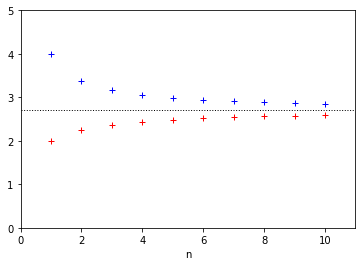

In [7]:
x = range(1,11)
y1 = []
y2 = []

for k in x :
    y1.append(f(k))
    y2.append(g(k))
    
    
#print(y)
p1 = plt.plot(x,y1,'r',marker = "+",linestyle = 'None')
p2 = plt.plot(x,y2,'b',marker = "+",linestyle = 'None')
plt.plot([0,11],[e,e],'k',linewidth=1,linestyle = ':')

plt.xlabel('n')
plt.axis([0,11,0,5])
plt.show()

### 1.2 Approximations de racine de 2 

**_1.2.a. par la méthode de Héron_**

Basé sur une suite récurrente : $ u_{n+1} = \dfrac {1}{2} \left(u_n + \dfrac {A}{u_n} \right)$, l'algorithme de Babylone, ou algorithme de Héron, converge vers la racine carrée de A, quel que soit le premier terme choisi positif.

Le démontrer.

**Programme Python**

In [8]:
def H(A,x):
    H = 1/2*(x+A/x)
    return H

A = 2
u = A
for k in range (1,10):
    u = H(A,u)
    print('u',k,' = ',u,'   précision : 10^',round(log(abs(u - sqrt(A)))/log(10)))
    # utilisation de la fonction native round (arrondi), de la fonction native abs (valeur absolue)
    # utilisation des fonction présentnes dans la bibliothèque "math" : log (logarithme népérien) et sqrt (racine carrée)
    


u 1  =  1.5    précision : 10^ -1
u 2  =  1.4166666666666665    précision : 10^ -3
u 3  =  1.4142156862745097    précision : 10^ -6
u 4  =  1.4142135623746899    précision : 10^ -12
u 5  =  1.414213562373095    précision : 10^ -16
u 6  =  1.414213562373095    précision : 10^ -16
u 7  =  1.414213562373095    précision : 10^ -16
u 8  =  1.414213562373095    précision : 10^ -16
u 9  =  1.414213562373095    précision : 10^ -16


Les "limites" de la machine sont atteintes en très peu d'itérations !!! 
(La précision des nombres flottants est de l'ordre de $10^{-16}$)

**_1.2.b. Approximation de racine de 2 par un développement en fraction continue : formule de Lagrange (1736-1813)_**

![...](https://drive.google.com/uc?id=1DXQX0DcYkEfZhnlYvSpDXaEwgLQf1snB)

Cette écriture n'est autre que l'écriture sous forme de fraction continue de la suite de l'algorithme de Héron (avec A = 2)

### 1.3 Approximations de $\phi$ ###

**_1.3.a. Par une suite récurrente simple (aisément généralisable à toute suite récurrente du type u<sub>n+1</sub> = f(u<sub>n</sub>) )_**

In [9]:
def f(x):
    f = sqrt(x+1)
    return f

u = 5
for k in range (1,10):
    u = f(u)
    print('u',k,' = ',u,'   précision : 10^',round(log(abs(u - (1+sqrt(5))/2))/log(10)))

u 1  =  2.449489742783178    précision : 10^ 0
u 2  =  1.8572802003960462    précision : 10^ -1
u 3  =  1.6903491356509892    précision : 10^ -1
u 4  =  1.640228379114015    précision : 10^ -2
u 5  =  1.624877958221483    précision : 10^ -2
u 6  =  1.620147511253677    précision : 10^ -3
u 7  =  1.6186869713609475    précision : 10^ -3
u 8  =  1.6182357588932916    précision : 10^ -4
u 9  =  1.6180963379518822    précision : 10^ -4


**_Construction graphique des termes de la suite_**

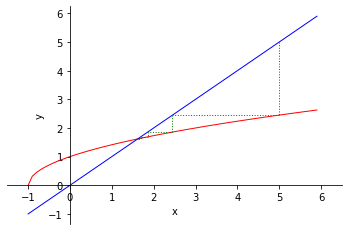

In [10]:
xx = np.arange(-1,6,0.1)
yy = []
ii = []
for ix in xx :
    yy.append(sqrt(ix+1))
    ii.append(ix)
    
p1 = plt.plot(xx,yy,'r',linewidth=1)
p2 = plt.plot(xx,ii,'b',linewidth=1)

u = 5
x = range(5)

for k in x :
    y = sqrt(u+1)
    plt.plot(u,y,'r')
    plt.plot([u,y],[y,y],'g',linewidth=1,linestyle = ':')
    plt.plot([u,u],[u,y],'g',linewidth=1,linestyle = ':')
    u = sqrt(u+1)


plt.xlabel('x')
plt.ylabel('y')
#plt.axis([-1.5,6,0,4])

ax = plt.gca() # récupération du paramétrage des axes

ax.spines['left'].set_position('zero') # positionnement de l'axe des ordonnées à x = 0
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero') # positionnement de l'axe des abscisses à y = 0
ax.spines['top'].set_color('none')

plt.xlim(-1.5,6.5) # dimensionnement de l'axe des abscisse, celui des ordonnées sera dimensionné automatiquement

plt.show()

**_1.3.b. Par une suite récurrente linéaire d'ordre 2_**

Dans la suite de **Fibonnacci (1170-1240)**, le rapport de deux termes consécutifs tend vers $\phi$, c'est l'occasion de programmer une telle suite...

In [11]:
a = 1
b = 1

print('F 0 = 1')
print('F 1 = 1  , r 1 = 1')
for k in range (2,10):
    r = b/a
    F = a + b
    print('F',k,'=',F,'  , r',k,'=',r)
    a = b
    b = F


F 0 = 1
F 1 = 1  , r 1 = 1
F 2 = 2   , r 2 = 1.0
F 3 = 3   , r 3 = 2.0
F 4 = 5   , r 4 = 1.5
F 5 = 8   , r 5 = 1.6666666666666667
F 6 = 13   , r 6 = 1.6
F 7 = 21   , r 7 = 1.625
F 8 = 34   , r 8 = 1.6153846153846154
F 9 = 55   , r 9 = 1.619047619047619


**_seuil_**

La suite F <sub>n</sub> étant de sens alterné, oscillant autour de $\phi$, on peut calculer un seuil pour obtenir une précision cherchée en considérant l'écart entre deux termes consécutifs.


**<span style="color: #26B260">Python : boucle *while* pour la recherche de seuil</span>**

In [12]:
a = 1
b = 1
r = b/a
old = 2
k = 2

#nb_decimales = int(input('Entrez la précision cherchée, nombre de chiffres après la virgule : '))
nb_decimales = 9

while abs(old - r)> 10**(-nb_decimales):
    old = r
    k = k+1
    F = a + b
    a = b
    b = F
    r = b/a
    #print(r)
    
print('À 10^-',nb_decimales,' près, une valeur approchée de Phi est : ',round(r,nb_decimales) , ' obtenue après ',k,' itérations.')
# résultat formaté selon la précision cherchée

À 10^- 9  près, une valeur approchée de Phi est :  1.618033989  obtenue après  25  itérations.


**_Représentation graphique_**

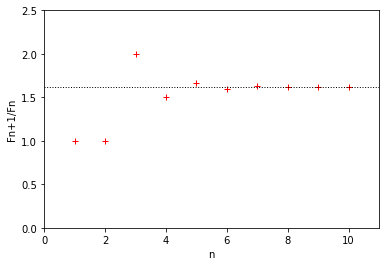

In [13]:
a = 1
b = 1
r = [1]

for k in range (2,11):
    r.append(b/a)
    F = a + b
    a = b
    b = F
#print(r)

x = range(1,11)
plt.plot(x,r,'r',marker = "+",linestyle = 'None')

phi = (1+sqrt(5))/2

plt.plot([0,11],[phi,phi],'k',linewidth = 1,linestyle = ':')

plt.xlabel('n')
plt.ylabel('Fn+1/Fn')
plt.axis([0,11,0,2.5])
plt.show()


**_Variante_**

On obtient une valeur approchée de $\phi$ par son développement en fraction continue (qui n'est autre que la méthode précédente écrite autrement...)

In [14]:
def fc_phi(n):
    x = 1
    for k in range(n):
        x = 1/x
        x = x + 1
    return x

In [15]:
for k in range(1,11):
    print('Après ',k,' itérations, on a pour valeur approchée de Phi : ', fc_phi(k))

Après  1  itérations, on a pour valeur approchée de Phi :  2.0
Après  2  itérations, on a pour valeur approchée de Phi :  1.5
Après  3  itérations, on a pour valeur approchée de Phi :  1.6666666666666665
Après  4  itérations, on a pour valeur approchée de Phi :  1.6
Après  5  itérations, on a pour valeur approchée de Phi :  1.625
Après  6  itérations, on a pour valeur approchée de Phi :  1.6153846153846154
Après  7  itérations, on a pour valeur approchée de Phi :  1.619047619047619
Après  8  itérations, on a pour valeur approchée de Phi :  1.6176470588235294
Après  9  itérations, on a pour valeur approchée de Phi :  1.6181818181818182
Après  10  itérations, on a pour valeur approchée de Phi :  1.6179775280898876


### 1.4 Convergences vers $\pi$  ###

**_1.4.a. La formule de Brouncker (1620-1684) : décomposition en fraction continue_**

![...](https://drive.google.com/uc?id=1GjiTAn_kbPovmPHo80hbHW1GLijjz4UR)

Le problème est qu'il faudrait connaître le dernier terme (celui des points de suspension) pour pouvoir, littéralement, remonter au premier.

Heureusement, Brouncker a démontré que, pour n "assez grand", u<sub>n</sub> était environ égal à 2n+1, ainsi, en remplaçant, on est en mesure de calculer une valeur approchée de $\pi$  (voir ici : http://serge.mehl.free.fr/anx/pi_brouncker.html)


In [16]:
def brouncker(nmax):
    u = 2*nmax + 1
    for n in range(nmax,0,-1):
        u = (2*n+1)**2/(2+u)
    u = 1 / (2+u)
    va_pi = 4/(1+u)
    return va_pi


In [17]:
brouncker(10)

3.1414067184965018

In [18]:
brouncker(100)

3.1415924109719806

In [19]:
brouncker(1000)

3.141592653340542

In [20]:
brouncker(10000)

3.141592653589543

**_1.4.b. $\pi$ à partir de la moyenne arithmético-géométrique de 1 et $\frac{1}{\sqrt 2}$_**


Cette méthode est très très rapide, car on double le nombre de décimales exactes à chaque itération.

Elle permet de programmer deux suites définies par des relations de récurrence entrelacées.

In [21]:
x = 1
c = 1/4
u = 1
v = 1 / sqrt(2)
n = 5

for k in range(1,n+1):
    y = u # stockage de l'ancienne valeur de u
    u = (u+v)/2 # moyenne arithmétique
    v = sqrt(v*y)
    c = c - x*(u-y)**2
    x = 2*x
    p = (u+v)**2/(4*c)
    print('Itération n°',k,'valeur approchée de Pi : ',p, '   précision 10^',round(log(abs(p - pi))/log(10)))



Itération n° 1 valeur approchée de Pi :  3.1405792505221686    précision 10^ -3
Itération n° 2 valeur approchée de Pi :  3.141592646213543    précision 10^ -8
Itération n° 3 valeur approchée de Pi :  3.141592653589794    précision 10^ -15
Itération n° 4 valeur approchée de Pi :  3.141592653589794    précision 10^ -15
Itération n° 5 valeur approchée de Pi :  3.141592653589794    précision 10^ -15


**_1.4.c. Et un petit produit dû à Wallis (1616-1703)_**

![...](https://drive.google.com/uc?id=1lMHGGLmn6uvZJJJTS2E4zMd8_hAdSvgs)
(pas très rapide, mais bon... on a vu pire...)

In [22]:
P = 1
N = 20
for n in range(1,N+1):
    P = P*(1 + 1/(4*n**2 - 1))
    print('Itération n°',n,' : ',2*P)


Itération n° 1  :  2.6666666666666665
Itération n° 2  :  2.844444444444444
Itération n° 3  :  2.9257142857142853
Itération n° 4  :  2.972154195011337
Itération n° 5  :  3.0021759545569062
Itération n° 6  :  3.0231701920013605
Itération n° 7  :  3.038673628883419
Itération n° 8  :  3.0505899960555105
Itération n° 9  :  3.06003454712689
Itération n° 10  :  3.0677038066434985
Itération n° 11  :  3.074055160280442
Itération n° 12  :  3.0794013431678864
Itération n° 13  :  3.083963419231839
Itération n° 14  :  3.087902069831113
Itération n° 15  :  3.09133688859622
Itération n° 16  :  3.0943587232869296
Itération n° 17  :  3.09703782174865
Itération n° 18  :  3.0994293567461395
Itération n° 19  :  3.101577263438271
Itération n° 20  :  3.103516961539233


In [23]:
def wallis(N):
    P = 1
    for n in range(1,N+1):
        P = P*(1 + 1/(4*n**2 - 1))
    return 2*P


In [24]:
wallis(1000)

3.140807746030402

In [25]:
wallis(1000000)

3.141591868192149

C'est poussif, mais on sent bien qu'on y va...